In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [ ]:
!pip install pyarrow

In [ ]:
path = '/content/drive/MyDrive/Python Project Practise/sales analysis/Sales_data.ftr'
a = pd.read_feather(path)
a
#

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [ ]:
a.info()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [ ]:
a.isnull()
#

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [ ]:
a.isnull().sum()

,0
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,545
Purchase Address,545


In [ ]:
a.dropna(inplace=True)
a.isnull().sum()
#

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


In [ ]:
a[a.duplicated()]
#

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [ ]:
a.drop_duplicates(inplace=True)
a[a.duplicated()]
#

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
# Try using the 'infer_datetime_format' parameter to let pandas guess the format
a['Order Date'] = pd.to_datetime(a['Order Date'], infer_datetime_format=True, errors='coerce')

# Inspect any dates that couldn't be parsed (they will be NaT - Not a Time)
a[a['Order Date'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address


In [ ]:
a = a.dropna(how='any')

In [ ]:
# Try using the 'infer_datetime_format' parameter to let pandas guess the format
a['Order Date'] = pd.to_datetime(a['Order Date'], infer_datetime_format=True, errors='coerce')

# Inspect any dates that couldn't be parsed (they will be NaT - Not a Time)
a[a['Order Date'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


**Analyzing monthly sale**

In [ ]:
a['Order Date'] = pd.to_datetime(a['Order Date'], format='%m/%d/%y') #reassuring date and time format

new_format = '%Y-%m-%d %H:%M' #new date and time format
a['Order Date'] = a['Order Date'].dt.strftime(new_format) #convert to new date and time format

a

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,2019-09-01 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,2019-09-23 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30,"511 Forest St, San Francisco, CA 94016"


In [ ]:
a['Order Date'][0]

'2019-04-19 08:46'

In [ ]:
a['Order Date'][0].split(' ')[0].split('-')[1] #extract month

'04'

In [ ]:
months = []
for i in a['Order Date']:
  months.append(i.split(' ')[0].split('-')[1])  #extracting months
a['Months'] = months #new column with months
a

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,2019-04-12 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,2019-09-01 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,2019-09-23 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [ ]:
a.dtypes

,0
Order ID,object
Product,object
Quantity Ordered,object
Price Each,object
Order Date,object
Purchase Address,object
Months,object


In [ ]:
a['Months'] = a['Months'].astype(int)
a.dtypes

,0
Order ID,object
Product,object
Quantity Ordered,object
Price Each,object
Order Date,object
Purchase Address,object
Months,int64


In [ ]:
# to check the missing values
# Assuming 'a' is your DataFrame
missing_indices = a.index.difference(range(len(a)))

if len(missing_indices) == 0:
  print("There are no missing indices in your DataFrame.")
else:
  print("There are missing indices. You might not be seeing the entire DataFrame.")

There are missing indices. You might not be seeing the entire DataFrame.


In [ ]:
a = a.reset_index(drop=True)
a

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,2019-04-12 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56,"840 Highland St, Los Angeles, CA 90001",9
185682,259354,iPhone,1,700,2019-09-01 16:00,"216 Dogwood St, San Francisco, CA 94016",9
185683,259355,iPhone,1,700,2019-09-23 07:39,"220 12th St, San Francisco, CA 94016",9
185684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [ ]:
a['Quantity Ordered'] = a['Quantity Ordered'].astype(int)
a['Price Each'] = a['Price Each'].astype(float)
a.dtypes

,0
Order ID,object
Product,object
Quantity Ordered,int64
Price Each,float64
Order Date,object
Purchase Address,object
Months,int64


In [ ]:
a['Sales'] = a['Quantity Ordered'] * a['Price Each']
a

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
185682,259354,iPhone,1,700.00,2019-09-01 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
185683,259355,iPhone,1,700.00,2019-09-23 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
185684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [ ]:
a.groupby(['Months'])['Sales'].sum()

,Sales
Months,
1,1821413.16
2,2200078.08
3,2804973.35
4,3389217.98
5,3150616.23
6,2576280.15
7,2646461.32
8,2241083.37
9,2094465.69


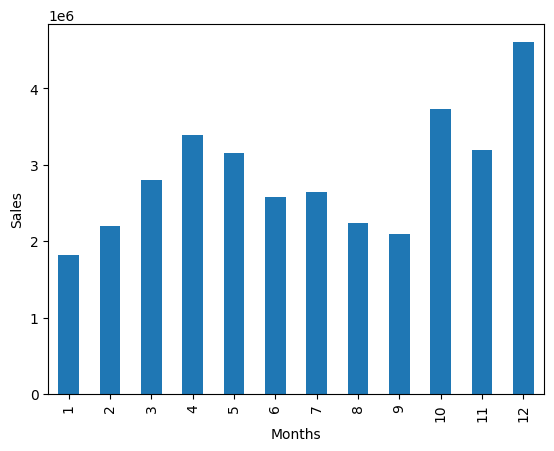

In [ ]:
a.groupby(['Months'])['Sales'].sum().plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

**Monthly sales in each city**

In [ ]:
Cities1 = []
for i in a['Purchase Address']:
  Cities1.append(i.split(',')[1])
a['Cities'] = Cities1
a

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,2019-04-12 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
185682,259354,iPhone,1,700.00,2019-09-01 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
185683,259355,iPhone,1,700.00,2019-09-23 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
185684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


**Monthly sales in each state**

In [ ]:
State1 = []
for i in a['Purchase Address']:
  State1.append(i.split(',')[2].split(' ')[1])
a['State'] = State1
a

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,CA
185682,259354,iPhone,1,700.00,2019-09-01 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,CA
185683,259355,iPhone,1,700.00,2019-09-23 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,CA
185684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,CA


In [ ]:
a.groupby(['Cities'])['Sales'].sum()

,Sales
Cities,
Atlanta,2794199.07
Austin,1818044.33
Boston,3658627.65
Dallas,2765373.96
Los Angeles,5448304.28
New York City,4661867.14
Portland,2319331.94
San Francisco,8254743.55
Seattle,2745046.02


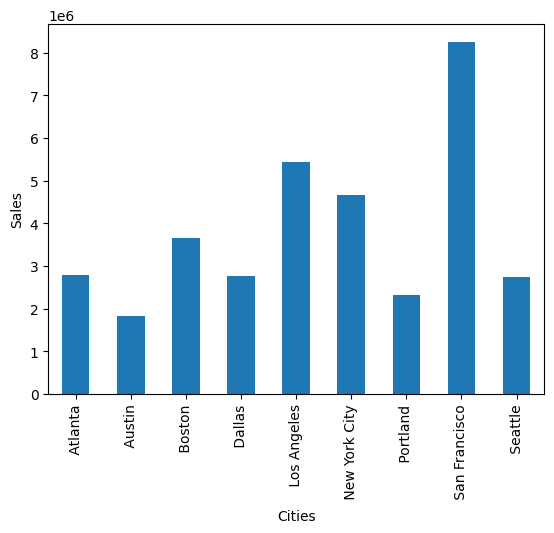

In [ ]:
a.groupby(['Cities'])['Sales'].sum().plot(kind='bar')
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.show()
#

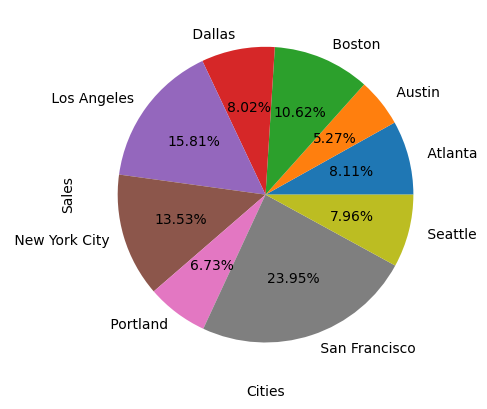

In [ ]:
a.groupby(['Cities'])['Sales'].sum().plot(kind='pie', autopct='%0.2f%%')
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.show()
#

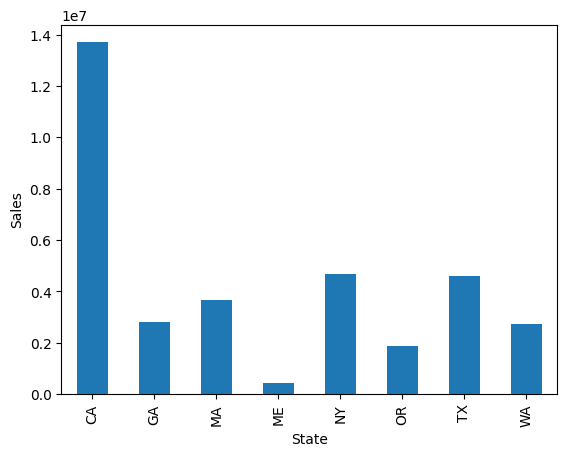

In [ ]:
a.groupby(['State'])['Sales'].sum().plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()

In [ ]:
pd.value_counts(a['Cities'])

,count
Cities,
San Francisco,44662
Los Angeles,29564
New York City,24847
Boston,19901
Atlanta,14863
Dallas,14797
Seattle,14713
Portland,12449
Austin,9890


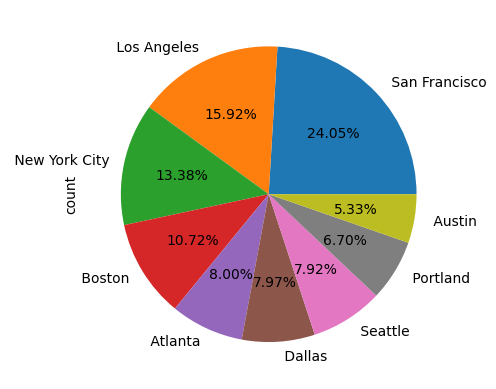

In [ ]:
pd.value_counts(a['Cities']).plot(kind='pie', autopct='%0.2f%%')
plt.show()
#

**Understanding which product sold the most and why?**

In [ ]:
unique_product1 = a['Product'].unique()
unique_product1

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [ ]:
unique_products_df = pd.DataFrame(unique_product1, columns=['Unique Products'])
unique_products_df

,Unique Products
0,USB-C Charging Cable
1,Bose SoundSport Headphones
2,Google Phone
3,Wired Headphones
4,Macbook Pro Laptop
5,Lightning Charging Cable
6,27in 4K Gaming Monitor
7,AA Batteries (4-pack)
8,Apple Airpods Headphones
9,AAA Batteries (4-pack)


In [ ]:
Quantiy_ordered1 = []
for i in a['Product'].unique():
  Quantiy_ordered1.append(a[a['Product'] == i]['Quantity Ordered'].sum())
unique_products_df['Quantities Ordered'] = Quantiy_ordered1
unique_products_df

,Unique Products,Quantities Ordered
0,USB-C Charging Cable,23931
1,Bose SoundSport Headphones,13430
2,Google Phone,5529
3,Wired Headphones,20524
4,Macbook Pro Laptop,4725
5,Lightning Charging Cable,23169
6,27in 4K Gaming Monitor,6239
7,AA Batteries (4-pack),27615
8,Apple Airpods Headphones,15637
9,AAA Batteries (4-pack),30986


In [ ]:
a[a['Product'] == 'USB-C Charging Cable']['Price Each'].mean()

11.95

In [ ]:
Price_each = []
for i in a['Product'].unique():
  Price_each.append(a[a['Product'] == i]['Price Each'].mean())
unique_products_df['Prices Each'] = Price_each
unique_products_df

,Unique Products,Quantities Ordered,Prices Each
0,USB-C Charging Cable,23931,11.95
1,Bose SoundSport Headphones,13430,99.99
2,Google Phone,5529,600.00
3,Wired Headphones,20524,11.99
4,Macbook Pro Laptop,4725,1700.00
5,Lightning Charging Cable,23169,14.95
6,27in 4K Gaming Monitor,6239,389.99
7,AA Batteries (4-pack),27615,3.84
8,Apple Airpods Headphones,15637,150.00
9,AAA Batteries (4-pack),30986,2.99


In [ ]:
#unique_products_df = unique_products_df.sort_values(by='Quantities Ordered', ascending=False)
#new_index = [f'P{i}' for i in range(1, len(unique_products_df) + 1)]
#unique_products_df.index = new_index
#unique_products_df

In [ ]:
#a.groupby(['Product']).agg({'Quantity Ordered':'sum', 'Price Each':'mean'}) #using agg function

In [ ]:
Products = a['Product'].unique()
Products

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

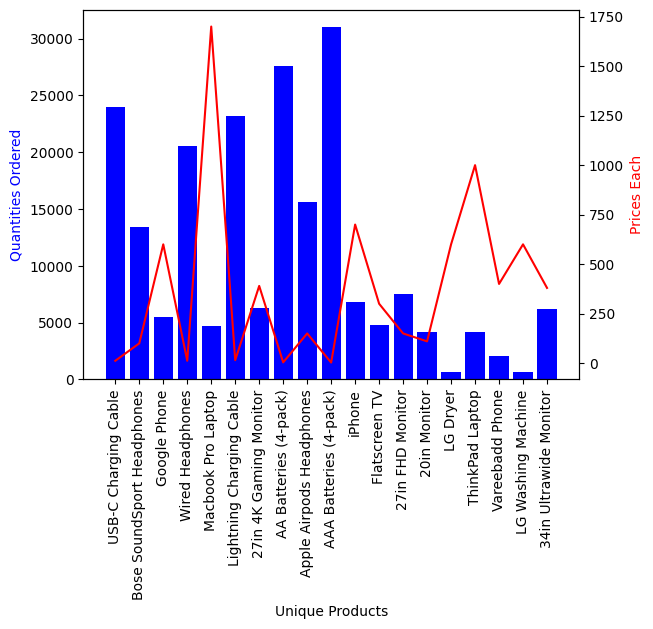

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(unique_products_df['Unique Products'], unique_products_df['Quantities Ordered'], color='b')
ax2.plot(unique_products_df['Unique Products'], unique_products_df['Prices Each'], color='r')
ax1.set_xticklabels(Products, rotation = 'vertical')
ax1.set_xlabel('Unique Products')
ax1.set_ylabel('Quantities Ordered', color='b')
ax2.set_ylabel('Prices Each', color='r')

plt.show()
#

**Understanding the trend of most sold products**

In [ ]:
#Creating pivot table
#understanding trend of the most sold products!

In [ ]:
#trend = pd.crosstab(a['Months'], a['Product']) #Method 1
#trend

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Months,,,,,,,,,,,,,,,,,,,
1,215,313,421,313,1037,1084,812,659,244,317,39,42,1069,235,218,1171,125,1004,381
2,245,424,471,415,1274,1320,1009,829,312,379,38,40,1393,276,275,1511,129,1179,438
3,323,478,605,520,1672,1645,1308,1181,358,463,49,64,1749,379,345,1766,174,1512,537
4,387,564,733,650,2062,1988,1507,1277,458,580,78,61,2197,452,390,2074,220,1888,691
5,338,541,688,543,1821,1888,1354,1165,399,479,76,64,1929,463,371,1879,185,1729,640
6,321,451,561,454,1540,1451,1152,969,366,391,43,55,1560,355,314,1531,155,1334,532
7,324,483,601,460,1555,1554,1212,1048,396,410,55,52,1690,368,319,1667,146,1434,501
8,258,437,484,378,1357,1340,998,871,331,359,46,48,1354,298,274,1339,141,1191,439
9,274,380,478,377,1314,1281,961,824,291,341,30,46,1324,287,249,1451,126,1173,396


In [ ]:
a['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [ ]:
most_sold_products = a['Product'].value_counts()[0:5].index
most_sold_products

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [ ]:
most_sold_products_df = a[a['Product'].isin(most_sold_products)]
most_sold_products_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,CA
7,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,GA
...,...,...,...,...,...,...,...,...,...,...
185676,259349,AAA Batteries (4-pack),1,2.99,2019-09-01 22:14,"911 River St, Dallas, TX 75001",9,2.99,Dallas,TX
185678,259350,USB-C Charging Cable,1,11.95,2019-09-30 13:49,"519 Maple St, San Francisco, CA 94016",9,11.95,San Francisco,CA
185680,259352,USB-C Charging Cable,1,11.95,2019-09-07 15:49,"976 Forest St, San Francisco, CA 94016",9,11.95,San Francisco,CA
185681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,CA


In [ ]:
pivot = most_sold_products_df.groupby(['Months', 'Product']).size().unstack()
pivot
#

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Months,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


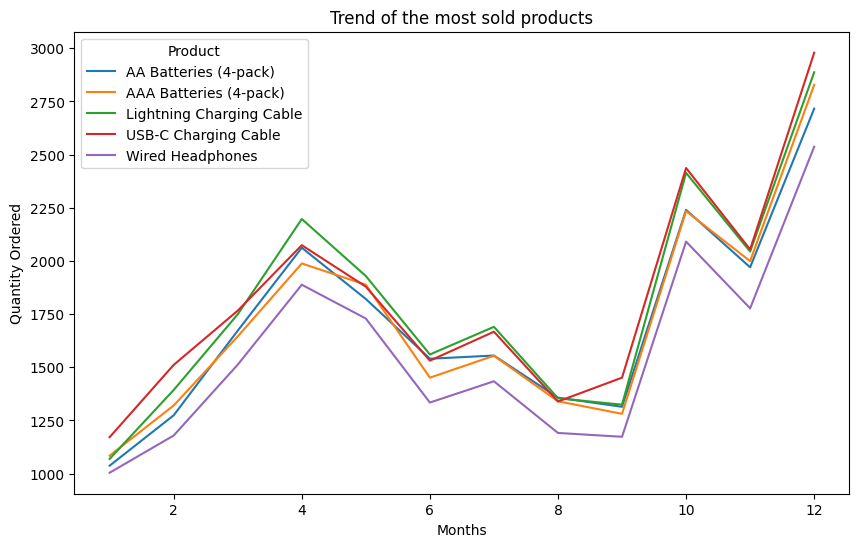

In [ ]:
pivot.plot(figsize=(10,6))
plt.xlabel('Months')
plt.ylabel('Quantity Ordered')
plt.title('Trend of the most sold products')
plt.show()

In [ ]:
a.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Months', 'Sales', 'Cities', 'State'],
      dtype='object')

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  object 
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
 6   Months            185686 non-null  int64  
 7   Sales             185686 non-null  float64
 8   Cities            185686 non-null  object 
 9   State             185686 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 14.2+ MB


In [ ]:
a['Cities'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

**Understanding which product sold the most in each city in every month of the year**

In [ ]:
# Group by 'Cities', 'Months', and 'Product'
grouped_data = a.groupby(['Cities', 'Months', 'Product'])

# Calculate the sum of 'Quantity Ordered' for each group
total_quantity = grouped_data['Quantity Ordered'].sum().reset_index()

# Sort by 'Quantity Ordered' in descending order
sorted_data = total_quantity.sort_values(by='Quantity Ordered', ascending=False)

# Get the top-selling product for each city and month
# No changes needed here as 'Product' column is now included
top_products = sorted_data.groupby(['Cities', 'Months'])['Product'].first().reset_index()

# Print the results
print(top_products)

       Cities  Months                 Product
0     Atlanta       1  AAA Batteries (4-pack)
1     Atlanta       2  AAA Batteries (4-pack)
2     Atlanta       3  AAA Batteries (4-pack)
3     Atlanta       4  AAA Batteries (4-pack)
4     Atlanta       5  AAA Batteries (4-pack)
..        ...     ...                     ...
103   Seattle       8  AAA Batteries (4-pack)
104   Seattle       9   AA Batteries (4-pack)
105   Seattle      10  AAA Batteries (4-pack)
106   Seattle      11  AAA Batteries (4-pack)
107   Seattle      12  AAA Batteries (4-pack)

[108 rows x 3 columns]


In [ ]:
# Change the aggregation function to 'first' to get the first product for each cell
pivot_table1 = top_products.pivot_table(values='Product', index='Months', columns='Cities', aggfunc='first')

# Print the pivot table
print(pivot_table1)

Cities                 Atlanta                    Austin  \
Months                                                     
1       AAA Batteries (4-pack)    AAA Batteries (4-pack)   
2       AAA Batteries (4-pack)  Lightning Charging Cable   
3       AAA Batteries (4-pack)     AA Batteries (4-pack)   
4       AAA Batteries (4-pack)     AA Batteries (4-pack)   
5       AAA Batteries (4-pack)    AAA Batteries (4-pack)   
6        AA Batteries (4-pack)     AA Batteries (4-pack)   
7        AA Batteries (4-pack)    AAA Batteries (4-pack)   
8       AAA Batteries (4-pack)    AAA Batteries (4-pack)   
9       AAA Batteries (4-pack)    AAA Batteries (4-pack)   
10      AAA Batteries (4-pack)    AAA Batteries (4-pack)   
11      AAA Batteries (4-pack)    AAA Batteries (4-pack)   
12      AAA Batteries (4-pack)     AA Batteries (4-pack)   

Cities                  Boston                  Dallas  \
Months                                                   
1       AAA Batteries (4-pack)   AA Batteri

**Understanding which product sold the least in each city in every month of the year**

In [ ]:
# Group by 'Cities', 'Months', and 'Product'
grouped_data = a.groupby(['Cities', 'Months', 'Product'])

# Calculate the sum of 'Quantity Ordered' for each group
total_quantity = grouped_data['Quantity Ordered'].sum().reset_index()

# Sort by 'Quantity Ordered' in descending order
sorted_data = total_quantity.sort_values(by='Quantity Ordered', ascending=True)

# Get the lowest-selling product for each city and month
# No changes needed here as 'Product' column is now included
lowest_products = sorted_data.groupby(['Cities', 'Months'])['Product'].first().reset_index()

# Print the results
lowest_products

,Cities,Months,Product
0,Atlanta,1,LG Washing Machine
1,Atlanta,2,LG Dryer
2,Atlanta,3,LG Dryer
3,Atlanta,4,LG Washing Machine
4,Atlanta,5,LG Washing Machine
...,...,...,...
103,Seattle,8,LG Washing Machine
104,Seattle,9,LG Washing Machine
105,Seattle,10,LG Dryer
106,Seattle,11,LG Washing Machine


In [ ]:
# Change the aggregation function to 'first' to get the first product for each cell
pivot_table2 = lowest_products.pivot_table(values='Product', index='Months', columns='Cities', aggfunc='first')

# Print the pivot table
print(pivot_table2)

Cities             Atlanta              Austin              Boston  \
Months                                                               
1       LG Washing Machine  LG Washing Machine  LG Washing Machine   
2                 LG Dryer            LG Dryer  LG Washing Machine   
3                 LG Dryer            LG Dryer            LG Dryer   
4       LG Washing Machine  LG Washing Machine  LG Washing Machine   
5       LG Washing Machine  LG Washing Machine            LG Dryer   
6                 LG Dryer            LG Dryer            LG Dryer   
7                 LG Dryer  LG Washing Machine  LG Washing Machine   
8       LG Washing Machine  LG Washing Machine            LG Dryer   
9       LG Washing Machine            LG Dryer            LG Dryer   
10      LG Washing Machine  LG Washing Machine            LG Dryer   
11                LG Dryer  LG Washing Machine            LG Dryer   
12      LG Washing Machine  LG Washing Machine            LG Dryer   

Cities             

In [ ]:
#State wise and month wise see which top product sold

In [ ]:
grouped_data = a.groupby(['State', 'Months', 'Product'])

# Calculate the sum of 'Quantity Ordered' for each group
total_quantity = grouped_data['Quantity Ordered'].sum().reset_index()

# Sort by 'Quantity Ordered' in descending order
sorted_data = total_quantity.sort_values(by='Quantity Ordered', ascending=False)

# Get the top-selling product for each city and month
# No changes needed here as 'Product' column is now included
state_top_products = sorted_data.groupby(['State', 'Months'])['Product'].first().reset_index()

# Print the results
state_top_products

,State,Months,Product
0,CA,1,AAA Batteries (4-pack)
1,CA,2,AAA Batteries (4-pack)
2,CA,3,AAA Batteries (4-pack)
3,CA,4,AAA Batteries (4-pack)
4,CA,5,AAA Batteries (4-pack)
...,...,...,...
91,WA,8,AAA Batteries (4-pack)
92,WA,9,AA Batteries (4-pack)
93,WA,10,AAA Batteries (4-pack)
94,WA,11,AAA Batteries (4-pack)


In [ ]:
pivot_table3 = state_top_products.pivot_table(values='Product', index='Months', columns='State', aggfunc='first')

# Print the pivot table
print(pivot_table3)

State                       CA                      GA  \
Months                                                   
1       AAA Batteries (4-pack)  AAA Batteries (4-pack)   
2       AAA Batteries (4-pack)  AAA Batteries (4-pack)   
3       AAA Batteries (4-pack)  AAA Batteries (4-pack)   
4       AAA Batteries (4-pack)  AAA Batteries (4-pack)   
5       AAA Batteries (4-pack)  AAA Batteries (4-pack)   
6       AAA Batteries (4-pack)   AA Batteries (4-pack)   
7       AAA Batteries (4-pack)   AA Batteries (4-pack)   
8       AAA Batteries (4-pack)  AAA Batteries (4-pack)   
9       AAA Batteries (4-pack)  AAA Batteries (4-pack)   
10      AAA Batteries (4-pack)  AAA Batteries (4-pack)   
11      AAA Batteries (4-pack)  AAA Batteries (4-pack)   
12      AAA Batteries (4-pack)  AAA Batteries (4-pack)   

State                       MA                      ME  \
Months                                                   
1       AAA Batteries (4-pack)   AA Batteries (4-pack)   
2       AAA B

In [ ]:
#State wise and month wise see which low product sold

In [ ]:
grouped_data = a.groupby(['State', 'Months', 'Product'])

# Calculate the sum of 'Quantity Ordered' for each group
total_quantity = grouped_data['Quantity Ordered'].sum().reset_index()

# Sort by 'Quantity Ordered' in descending order
sorted_data = total_quantity.sort_values(by='Quantity Ordered', ascending=True)

# Get the lowest-selling product for each city and month
# No changes needed here as 'Product' column is now included
state_lowest_products = sorted_data.groupby(['State', 'Months'])['Product'].first().reset_index()

# Print the results
state_lowest_products

,State,Months,Product
0,CA,1,LG Dryer
1,CA,2,LG Dryer
2,CA,3,LG Dryer
3,CA,4,LG Washing Machine
4,CA,5,LG Washing Machine
...,...,...,...
91,WA,8,LG Washing Machine
92,WA,9,LG Washing Machine
93,WA,10,LG Dryer
94,WA,11,LG Washing Machine


In [ ]:
pivot_table4 = state_lowest_products.pivot_table(values='Product', index='Months', columns='State', aggfunc='first')

# Print the pivot table
print(pivot_table4)

State                   CA                  GA                  MA  \
Months                                                               
1                 LG Dryer  LG Washing Machine  LG Washing Machine   
2                 LG Dryer            LG Dryer  LG Washing Machine   
3                 LG Dryer            LG Dryer            LG Dryer   
4       LG Washing Machine  LG Washing Machine  LG Washing Machine   
5       LG Washing Machine  LG Washing Machine            LG Dryer   
6                 LG Dryer            LG Dryer            LG Dryer   
7       LG Washing Machine            LG Dryer  LG Washing Machine   
8                 LG Dryer  LG Washing Machine            LG Dryer   
9                 LG Dryer            LG Dryer            LG Dryer   
10      LG Washing Machine  LG Washing Machine            LG Dryer   
11      LG Washing Machine            LG Dryer            LG Dryer   
12                LG Dryer  LG Washing Machine            LG Dryer   

State              